# Современные методы предобработки текстов (эмбеддинги)

*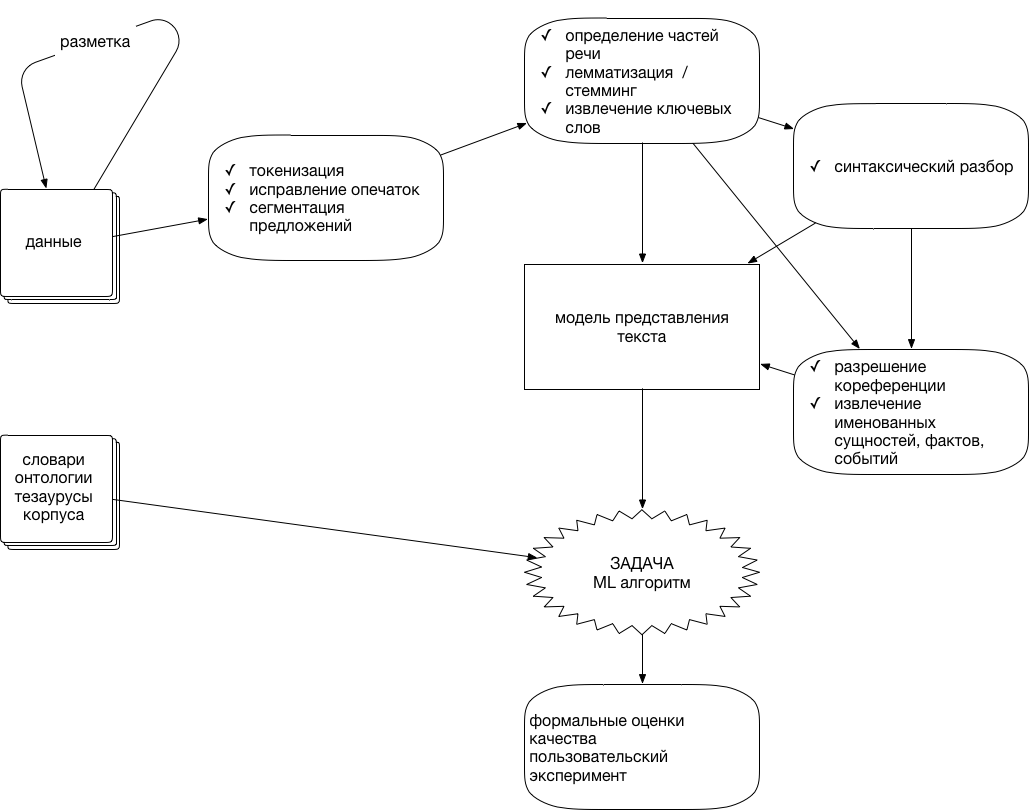

Ссылка на источник картинки: https://github.com/ancatmara/data-science-nlp/

## Word2Vec 

**Векторное представление слов** (англ. word embedding) — общее название для различных подходов к моделированию языка и обучению представлений в обработке естественного языка, направленных на сопоставление словам из некоторого словаря векторов небольшой размерности.

Векторные модели, которые мы рассматривали на прошлой лекции (BOW, мешок слов, мешок n-грамм, символьные n-граммs; TF-IDF), условно называются *счётными*. Они основываются на том, что так или иначе "считают" слова и их соседей, и на основе этого строят вектора для слов.

*Замечание.* На самом деле, мы тут сравниваем немного разные вещи. Модель "мешок слов" фактически делает нам вектор не для слова, а для документа. При этом для векторного представления слов в такой модели используется стандартный подход: one-hot encoding. Пусть число различных слов равно $K$. Сопоставим слову с номером $i$ вектор длины $K$, в котором $i$-тая координата равна единице, а все остальные — нулям. Недостатком one-hot encoding является то, что по векторным представлениям нельзя судить о схожести смысла слов. Также вектора имеют очень большой размер, из-за чего их неэффективно хранить в памяти.


Другой класс моделей, который повсеместно распространён на сегодняшний день, называется *предсказательными* моделями. Идея этих моделей заключается в использовании нейросетевых архитектур, которые "предсказывают" (а не считают) соседей для каждого слова.

Одной из самых известных таких моделей является `word2vec`. Технология основана на нейронной сети, предсказывающей вероятность встретить слово в заданном контексте. Этот инструмент был разработан группой исследователей Google в 2013 году, руководителем проекта был Томаш Миколов (сейчас работает в Facebook). Вот две самые главные статьи:

* [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781.pdf)
* [Distributed Representations of Words and Phrases and their Compositionality](https://arxiv.org/abs/1310.4546)


Полученные таким образом вектора называются *распределенными представлениями слов*, вложениями или **эмбеддингами**.

Кроме работы со словами, некоторые  концепции `word2vec` оказались эффективны в разработке рекомендательных механизмов и придании смысла данным даже в коммерческих, неязыковых задачах. Эту технологию применили в своих движках рекомендаций такие компании, как Airbnb, Alibaba, Spotify и Anghami.

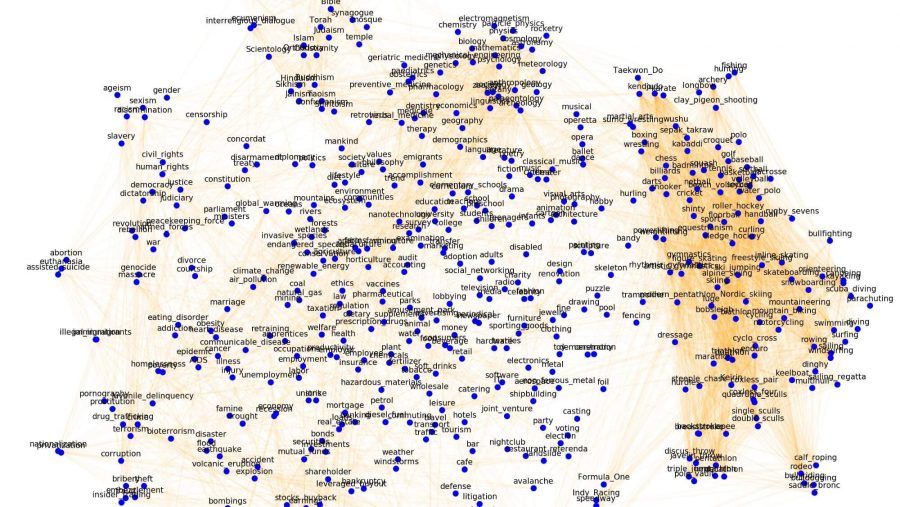

Минутка истории:
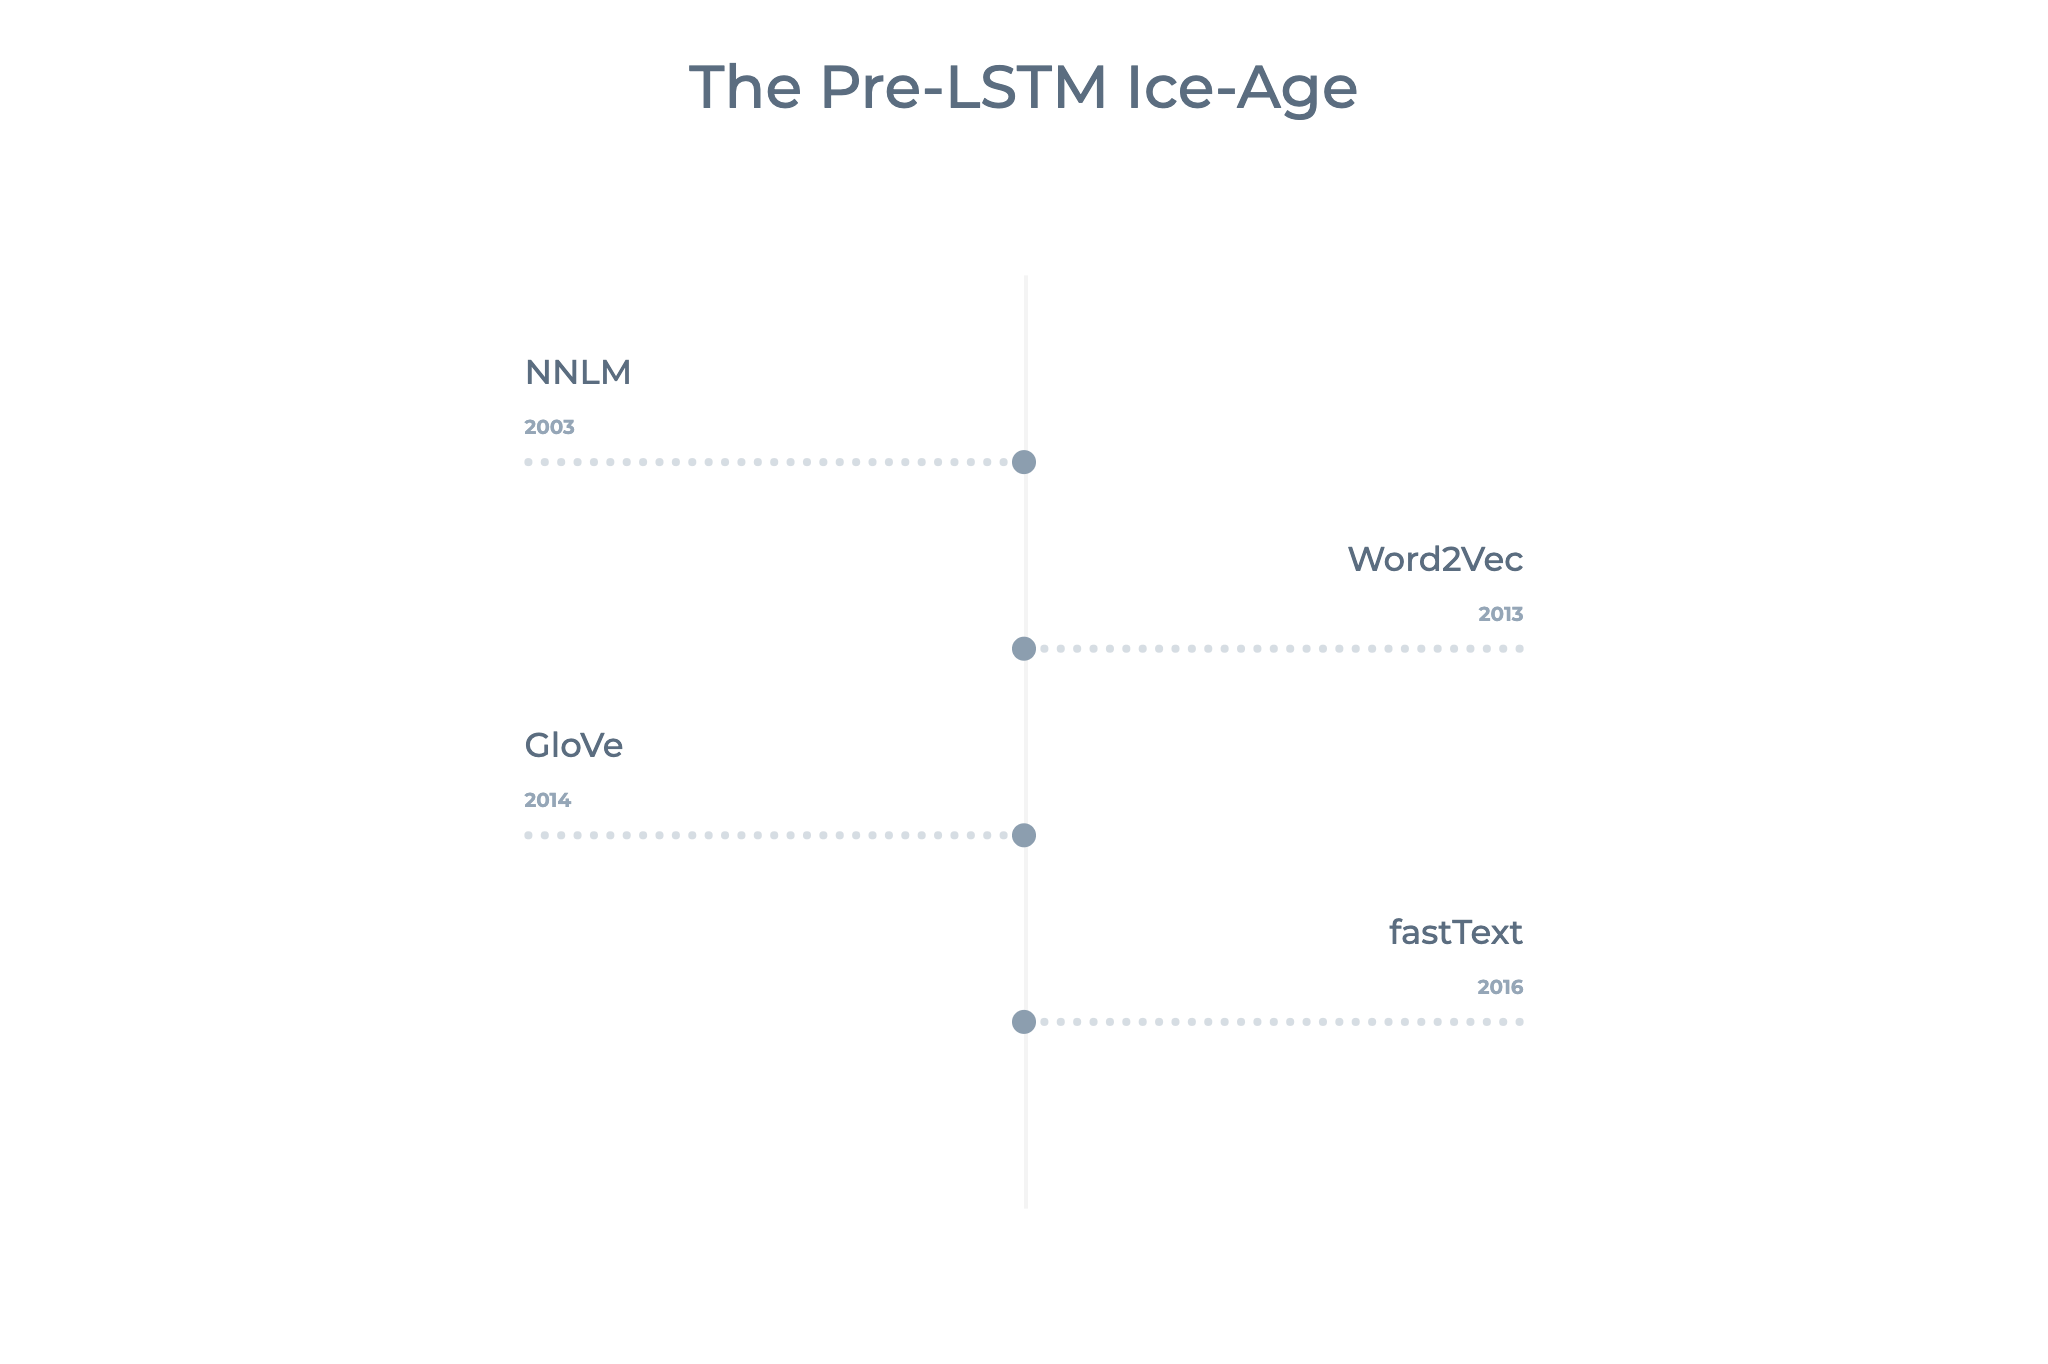

[Источник картинки](https://proglib.io/p/obzor-chetyreh-populyarnyh-nlp-modeley-2020-04-21)

### Идея word2vec

Способ построения сжатого пространства векторов слов, использующий нейронные сети. Принимает на вход большой текстовый корпус и сопоставляет каждому слову вектор. Сначала он создает словарь, а затем вычисляет векторное представление слов. Векторное представление основывается на контекстной близости: слова, встречающиеся в тексте рядом с одинаковыми словами (а следовательно, имеющие схожий смысл), в векторном представлении имеют высокое косинусное сходство (cosine similarity).


$$\text{similarity}(\mathbf{A}, \mathbf{B}) = \cos(\theta) = {\mathbf{A} \cdot \mathbf{B} \over \|\mathbf{A}\| \|\mathbf{B}\|} = \frac{ \sum\limits_{i=1}^{n}{A_i  B_i} }{ \sqrt{\sum\limits_{i=1}^{n}{A_i^2}}  \sqrt{\sum\limits_{i=1}^{n}{B_i^2}} }$$

Векторное представление основывается на *контекстной близости*: слова, встречающиеся в тексте рядом с одинаковыми словами (а следовательно, согласно дистрибутивной гипотезе, имеющие схожий смысл), в векторном представлении будут иметь близкие координаты векторов-слов. Для вычисления близости слов используется косинусное расстояние между их векторами.

С помощью дистрибутивных векторных моделей можно строить семантические пропорции (они же аналогии: А относится к B так же, как C относится к D) и решать примеры:

* *король: мужчина = королева: женщина* 
 $\Rightarrow$ 
* *король - мужчина + женщина = королева*

![w2v](https://cdn-images-1.medium.com/max/2600/1*sXNXYfAqfLUeiDXPCo130w.png)

Минутка истории: 

Дистрибутивный анализ был предложен Леонардом Блумфилдом в 20-х гг. XX века и применялся, главным образом, в фонологии и морфологии. Американский лингвист (родом из Одесской губернии Российской империи) Зеллиг Харрис и другие представители дескриптивной лингвистики развивали данный метод в своих работах в 30 — 50-х гг. XX века. 
Дистрибутивная семантика основывается на **дистрибутивной гипотезе**: *лингвистические единицы, встречающиеся в схожих контекстах, имеют близкие значения*. (Иногда это называют гипотезой Харриса).

Близкие идеи выдвигали основоположники структурной лингвистики Ф. де Соссюр и Л. Витгенштейн.

Идея контекстных векторов была предложена психологом Чарльзом Осгудом в 1957 году в рамках работ по представлению значений слов. (Хотя сам термин впервые появился в 1991 году работе Gallant S. Context vector representations for document retrieval)
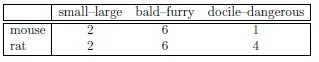

### Как это обучается?

Очень подробный обзор с картинками: https://habr.com/ru/post/446530/

И ещё один: https://neurohive.io/ru/osnovy-data-science/word2vec-vektornye-predstavlenija-slov-dlja-mashinnogo-obuchenija/





Мы задаём вектор для каждого слова с помощью матрицы $w$ и вектор контекста с помощью матрицы $W$. По сути, word2vec является обобщающим названием для двух архитектур Skip-Gram и Continuous Bag-Of-Words (CBOW).  

![](https://www.researchgate.net/profile/Daniel_Braun6/publication/326588219/figure/fig1/AS:652185784295425@1532504616288/Continuous-Bag-of-words-CBOW-CB-and-Skip-gram-SG-training-model-illustrations.png)

**CBOW** предсказывает текущее слово, исходя из окружающего его контекста. 

**Skip-gram**, наоборот, использует текущее слово, чтобы предугадывать окружающие его слова. 



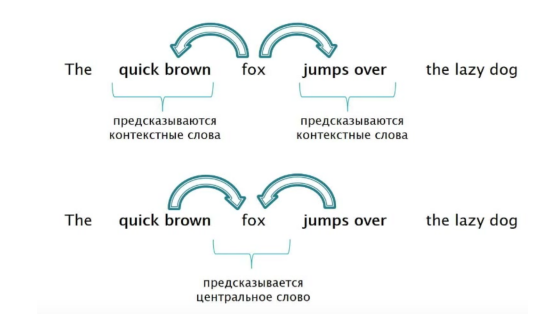


## Skip gram

(Предсказание контекста по слову, один из основных параметров - windows_size)

![Замещающий текст](http://mccormickml.com/assets/word2vec/training_data.png)

1. Представляем корпус текста в формате One-hot encoding, подаем вектор на вход нейросети

2. В качестве активации последнего слоя используем softmax -> переходим в пространство вероятностей (как будто задача классификации с очень большим количеством классов)

3. Предсказываем слово контекста по максимальной вероятности

![Замещающий текст](https://miro.medium.com/max/875/0*FD_ZSVKFywSg-CJM.png)

Модель хорошо работает с небольшим количеством тренировочных данных



Подсчёт нормировочной константы в softmax — дорогая
операция. Чтобы увеличить производительность используют negative sampling.


## CBOW

![](https://iksinc.files.wordpress.com/2015/04/screen-shot-2015-04-12-at-10-58-21-pm.png)

Тренируется быстрее, чем SkipGram, лучше точность на редких словах


### Проблемы
Невозможно установить тип семантических отношений между словами: синонимы, антонимы и т.д. будут одинаково близки, потому что обычно употребляются в схожих контекстах. Поэтому близкие в векторном пространстве слова называют *семантическими ассоциатами*. Это значит, что они семантически связаны, но как именно — непонятно.


## RusVectōrēs


На сайте [RusVectōrēs](https://rusvectores.org/ru/) собраны предобученные на различных данных модели для русского языка, а также можно поискать наиболее близкие слова к заданному, посчитать семантическую близость нескольких слов и порешать примеры с помощью «калькулятора семантической близости».


Для других языков также можно найти предобученные модели — например, модели [fastText](https://fasttext.cc/docs/en/english-vectors.html) и [GloVe](https://nlp.stanford.edu/projects/glove/).

## Gensim

Использовать предобученную модель эмбеддингов или обучить свою можно с помощью библиотеки `gensim`. Вот [ее документация](https://radimrehurek.com/gensim/models/word2vec.html).

### Как использовать готовую модель

Модели word2vec бывают разных форматов:

* .vec.gz — обычный файл (текстовый)
* .bin.gz — бинарный файл

Загружаются они с помощью одного и того же класса `KeyedVectors`, меняется только параметр `binary` у функции `load_word2vec_format`. 

Если же эмбеддинги обучены **не** с помощью word2vec, то для загрузки нужно использовать функцию `load`. Т.е. **для загрузки предобученных эмбеддингов *glove, fasttext, bpe* и любых других нужна именно она**.

В gensim есть ряд предобученных моделей: https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models

Мы попытаемся взять модель не из gensim. Скачаем с RusVectōrēs модель для русского языка, обученную на НКРЯ образца 2015 г. 

In [ ]:
import urllib.request # библиотека для скачивания данных
import gensim # библиотека для загрузки и использвоания моделй w2v
from gensim.models import word2vec # непосредственно методы w2v

In [ ]:
# скачиваем модель ruscorpora_mystem_cbow_300 с сайта rusvectores
# 300 - размерность вектора embeddings для слов

urllib.request.urlretrieve("http://rusvectores.org/static/models/rusvectores2/ruscorpora_mystem_cbow_300_2_2015.bin.gz", "ruscorpora_mystem_cbow_300_2_2015.bin.gz")

('ruscorpora_mystem_cbow_300_2_2015.bin.gz',
 <http.client.HTTPMessage at 0x7f3dc3591650>)

Загружаем скачанную модель. Обратите внимание, что мы скачали бинарный файл (.bin.gz), поэтому у функции load_word2vec_format() параметр binary=True

In [ ]:
model_path = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'

model_ru = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)

Посмотрим на ближайших соседей следующей группы слов:

In [ ]:
words = ['день_S', 'ночь_S', 'человек_S', 'семантика_S', 'биткоин_S']

Частеречные тэги (например, _S, тег части речи слова) нужны, поскольку это специфика скачанной модели - она была натренирована на словах, размеченных по частям речи (и лемматизированных). 

**NB!** В названиях моделей на `rusvectores` указано, какой тегсет (набор обозначений тегов) они используют (mystem, upos и т.д.)

Попросим у модели 5 ближайших соседей для каждого слова и косинусные близости для каждого:

In [ ]:
for word in words:
    # есть ли слово в модели? 
    if word in model_ru:
        print(word)
        # смотрим на вектор слова (его размерность 300, смотрим на первые 10 чисел)
        print(model_ru[word][:10])
        # выдаем 10 ближайших соседей слова:
        for word, sim in model_ru.most_similar(positive=[word], topn=5):
            # слово + коэффициент косинусной близости
            print(word, ': ', sim)
        print('\n')
    else:
        # Увы!
        print('Увы, слова "%s" нет в модели!' % word)

день_S
[-0.02580778  0.00970898  0.01941961 -0.02332282  0.02017624  0.07275085
 -0.01444375  0.03316632  0.01242602  0.02833412]
неделя_S :  0.7165195941925049
месяц_S :  0.631048858165741
вечер_S :  0.5828739404678345
утро_S :  0.5676207542419434
час_S :  0.5605547428131104


ночь_S
[-0.00688948  0.00408364  0.06975466 -0.00959525  0.0194835   0.04057068
 -0.00994112  0.06064967 -0.00522624  0.00520327]
вечер_S :  0.6946247816085815
утро_S :  0.57301926612854
ноченька_S :  0.5582467317581177
рассвет_S :  0.5553582906723022
ночка_S :  0.5351512432098389


человек_S
[ 0.02013756 -0.02670703 -0.02039861 -0.05477146  0.00086402 -0.01636335
  0.04240306 -0.00025525 -0.14045681  0.04785006]
женщина_S :  0.5979775190353394
парень_S :  0.4991787374019623
мужчина_S :  0.4767409563064575
мужик_S :  0.47384002804756165
россиянин_S :  0.47190436720848083


семантика_S
[-0.03066749  0.0053851   0.1110732   0.0152335   0.00440643  0.00384104
  0.00096944 -0.03538784 -0.00079585  0.03220548]
семант

Найдем похожесть пары слов функцией ```similarity()``` (там используется косинусная мера схожести):

In [ ]:
print(model_ru.similarity('человек_S', 'обезьяна_S'))

0.23895611


In [ ]:
print(model_ru.similarity('человек_S', 'лягушка_S'))

0.08958938


In [ ]:
print(model_ru.similarity('человек_S', 'бог_S'))

0.19224468


In [ ]:
print(model_ru.similarity('человек_S', 'мужчина_S'))

0.47674096


In [ ]:
print(model_ru.similarity('человек_S', 'женщина_S'))

0.59797746


У загруженной модели много различных функций. Например, можно решать задачи на семантическую близость.

Что получится, если вычесть из пиццы Италию и прибавить Сибирь?

Для решения примера в качестве параметров метода ```most_similar()``` необходимо передать:
* positive — вектора, которые мы складываем
* negative — вектора, которые вычитаем

*Замечание:* не забываем взять самый близкий элемент, для этого необходимо указать ```[0][0]```. Результатом является упоорядоченный по близости список из кортежей. Каждый кортеж - это пара из слова и его близости.

Что получится, если вычесть из пиццы Италию и прибавить Сибирь?

In [ ]:
print(model_ru.most_similar(negative=[ 'италия_S'], positive=['пицца_S','сибирь_S'])[0][0])

пельмень_S


А если прибавить не Сибирь, а Америку?

In [ ]:
print(model_ru.most_similar(negative=[ 'италия_S'], positive=['пицца_S','америка_S'])[0][0])

гамбургер_S


Ещё разберём несколько примеров:

In [ ]:
print(model_ru.most_similar(positive=['футбол_S', 'хоккей_S'], negative=['россия_S'])[0][0])

волейбол_S


In [ ]:
print(model_ru.most_similar(positive=['футбол_S', 'хоккей_S'], negative=['испания_S'])[0][0])

баскетбол_S


In [ ]:
print(model_ru.most_similar(positive=['зима_S', 'дождь_S'], negative=['снег_S'])[0][0])

лето_S


In [ ]:
print(model_ru.most_similar(positive=['красивый_A'])[0][0])

симпатичный_A


In [ ]:
print(model_ru.most_similar(positive=['мужчина_S', 'красивый_A'], negative=['женщина_S'])[0][0])

симпатичный_A


In [ ]:
print(model_ru.most_similar(positive=['человек_S', 'красивый_A'], negative=['женщина_S'])[0][0])

умный_A


**Задание.** Придумайте и проверьте с помощью метода `most_similar` несколько аналогий. Пришлите мне самые интересные, на ваш взгляд.

Метод ```doesnt_match()``` находит "лишнее слово" в группе слов:

In [ ]:
model_ru.doesnt_match('пицца_S пельмень_S хот-дог_S ананас_S'.split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'ананас_S'

In [ ]:
model_ru.doesnt_match('книга_S газета_S телевизор_S журнал_S'.split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'телевизор_S'

In [ ]:
model_ru.doesnt_match('лес_S тропинка_S трава_S куст_S'.split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'тропинка_S'

**Задание.** Придумайте и проверьте с помощью метода `doesnt_match` несколько последовательностей с лишними словами

### Как обучить свою модель

В качестве обучающих данных возьмем размеченные и неразмеченные отзывы о фильмах (датасет взят с Kaggle).

In [ ]:
# скачиваем датасет
! wget https://raw.githubusercontent.com/ancatmara/data-science-nlp/master/data/w2v/train/unlabeledTrainData.tsv

--2021-04-04 15:14:29--  https://raw.githubusercontent.com/ancatmara/data-science-nlp/master/data/w2v/train/unlabeledTrainData.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67281491 (64M) [text/plain]
Saving to: ‘unlabeledTrainData.tsv’

unlabeledTrainData. 100%[===================>]  64.16M  88.6MB/s    in 0.7s    

2021-04-04 15:14:34 (88.6 MB/s) - ‘unlabeledTrainData.tsv’ saved [67281491/67281491]



Загрузим датасет в датафрейм и посмотрим на него, делаем это с помощью  библиотеки **pandas**:

In [ ]:
import pandas as pd

In [ ]:
# считываем данные в формате csv
data = pd.read_csv("unlabeledTrainData.tsv", header=0, delimiter="\t", quoting=3)

len(data)

50000

In [ ]:
data.head()

,id,review
0,"""9999_0""","""Watching Time Chasers, it obvious that it was..."
1,"""45057_0""","""I saw this film about 20 years ago and rememb..."
2,"""15561_0""","""Minor Spoilers<br /><br />In New York, Joan B..."
3,"""7161_0""","""I went to see this film with a great deal of ..."
4,"""43971_0""","""Yes, I agree with everyone on this site this ..."


In [ ]:
data.iloc[10]['review']

'"After reading the comments for this movie, I am not sure whether I should be angry, sad or sickened. Seeing comments typical of people who a)know absolutely nothing about the military or b)who base everything they think they know on movies like this or on CNN reports about Abu-Gharib makes me wonder about the state of intellectual stimulation in the world.<br /><br />At the time I type this the number of people in the US military: 1.4 million on Active Duty with another almost 900,000 in the Guard and Reserves for a total of roughly 2.3 million.<br /><br />The number of people indicted for abuses at at Abu-Gharib: Currently less than 20<br /><br />That makes the total of people indicted .00083% of the total military. Even if you indict every single military member that ever stepped in to Abu-Gharib, you would not come close to making that a whole number. <br /><br />The flaws in this movie would take YEARS to cover. I understand that it\'s supposed to be sarcastic, but in reality, th

Нам необходимо отчистить данные от лишнего: убрать ссылки, html-разметку и небуквенные символы. Затем нужно привести все к нижнему регистру и токенизировать. 

На выходе мы хотим получить массив из предложений, каждое из которых представляет собой массив слов.

Импортируем необходимые библиотеки и методы (некоторые уже были испортированы ранее, но для полноты картины оставим их):

In [ ]:
import nltk.data # библиотека Natural Language Toolkit
import re   # библиотека для регулярных выражений
from bs4 import BeautifulSoup # библиотека для парсинга xml
from nltk.corpus import stopwords # стоп-слова из NLTK
from nltk.tokenize import sent_tokenize, RegexpTokenizer  # токенизаторы из NLTK
nltk.download('punkt') # пунктуация для правильной работы токенизатора

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

Функции для очистки данных:


In [ ]:
def review_to_wordlist(review, remove_stopwords=False):
    # убираем ссылки вне тегов
    review = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", " ", review)
    # достаем сам текст
    review_text = BeautifulSoup(review, "lxml").get_text()
    # оставляем только буквенные символы
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    # приводим к нижнему регистру и разбиваем на слова по символу пробела
    words = review_text.lower().split()
    if remove_stopwords:
      # убираем стоп-слова
        stops = stopwords.words("english")
        words = [w for w in words if not w in stops]
    return(words)

def review_to_sentences(review, tokenizer, remove_stopwords=False):
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(review_to_wordlist(raw_sentence, remove_stopwords))
    return sentences

Проходим по всему датасету и парсим написанной выше функцией  текст в списки слов, удаляя при этом лишнее:

In [ ]:
sentences = []  

print("Parsing sentences from training set...")
for review in data["review"]:
    sentences += review_to_sentences(review, tokenizer)

Parsing sentences from training set...


/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Посмотрим, что получилось:

In [ ]:
print(len(sentences))
print(sentences[0])

528987
['watching', 'time', 'chasers', 'it', 'obvious', 'that', 'it', 'was', 'made', 'by', 'a', 'bunch', 'of', 'friends']


In [ ]:
# сохраним очищенный текст в файле clean_text 
# это понадобится нам позже для обучения другой модели эмбеддингов 

with open('clean_text.txt', 'w') as f:
    for s in sentences[:5000]:
        f.write(' '.join(s))
        f.write('\n')

Для обучения своей модели нужно воспользоваться классом `Word2Vec`.  Данные должны быть итерируемым объектом. Основные параметры, которые можно указать в конструкторе класса:  
* size — размер вектора, 
* window — размер окна наблюдения,
* min_count — мин. частотность слова в корпусе,
* sg — используемый алгоритм обучения (0 — CBOW, 1 — Skip-gram),
* sample — порог для downsampling'a высокочастотных слов,
* workers — количество потоков,
* alpha — learning rate,
* iter — количество итераций,
* max_vocab_size — позволяет выставить ограничение по памяти при создании словаря (т.е. если ограничение превышается, то низкочастотные слова будут выбрасываться). Для сравнения: 10 млн слов = 1Гб RAM.

**NB!** Обратите внимание, что тренировка модели не включает препроцессинг! Это значит, что избавляться от пунктуации, приводить слова к нижнему регистру, лемматизировать их, проставлять частеречные теги придется до тренировки модели (если, конечно, это необходимо для вашей задачи). Т.е. в каком виде слова будут в исходном тексте, в таком они будут и в модели.

In [ ]:
print("Training model...")
# обучаем модель с векторами размерности 300, длиной окна 10
%time model_en = word2vec.Word2Vec(sentences, workers=4, size=300, min_count=10, window=10, sample=1e-3)

Training model...
CPU times: user 4min 5s, sys: 1.09 s, total: 4min 6s
Wall time: 2min 11s


Смотрим, сколько в модели слов.

In [ ]:
print(len(model_en.wv.vocab))

28308


Попробуем оценить модель вручную, порешав примеры. Несколько дано ниже, попробуйте придумать свои.

In [ ]:
print(model_en.wv.most_similar("plot", topn=3))
print(model_en.wv.most_similar("comedy", topn=3))

print(model_en.wv.most_similar(positive=["woman", "actor"], negative=["man"], topn=1)[0][0])
print(model_en.wv.most_similar(positive=["dogs", "man"], negative=["dog"], topn=1)[0][0])

print(model_en.wv.doesnt_match("comedy thriller novel horror noir".split()))

[('storyline', 0.7989619970321655), ('story', 0.6787866353988647), ('premise', 0.652877926826477)]
[('farce', 0.6923952698707581), ('humour', 0.6538681387901306), ('humor', 0.6468329429626465)]
actress
men
novel


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
print(model_en.wv.most_similar(positive=["drama", "laugh"], topn=1)[0][0])

comedy


In [ ]:
print(model_en.wv.most_similar(positive=["drama", "love"], topn=1)[0][0])

romance


In [ ]:
model_en.wv.similarity('lion', 'rabbit')

0.34978864

In [ ]:
model_en.wv.similarity('drama', 'comedy')

0.581362

### Как дообучить модель?

В качестве дополнительных данных для обучения возьмем английский текст «Алисы в Зазеркалье».

In [ ]:
! wget https://raw.githubusercontent.com/ancatmara/data-science-nlp/master/data/w2v/train/alice.txt

--2021-04-04 15:47:59--  https://raw.githubusercontent.com/ancatmara/data-science-nlp/master/data/w2v/train/alice.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167631 (164K) [text/plain]
Saving to: ‘alice.txt’

alice.txt           100%[===================>] 163.70K  --.-KB/s    in 0.03s   

2021-04-04 15:47:59 (5.73 MB/s) - ‘alice.txt’ saved [167631/167631]



In [ ]:
with open("alice.txt", 'r', encoding='utf-8') as f:
    text = f.read()

# убираем переносы строк, токенизируем текст

text = re.sub('\n', ' ', text)
sents = sent_tokenize(text)

punct = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~„“«»†*—/\-‘’'
clean_sents = []

# убираем всю пунктуацию и делим текст на слова по пробелу
for sent in sents:
    s = [w.lower().strip(punct) for w in sent.split()]
    clean_sents.append(s)
    
print(clean_sents[:2])

[['through', 'the', 'looking-glass', 'by', 'lewis', 'carroll', 'chapter', 'i', 'looking-glass', 'house', 'one', 'thing', 'was', 'certain', 'that', 'the', 'white', 'kitten', 'had', 'had', 'nothing', 'to', 'do', 'with', 'it', '', 'it', 'was', 'the', 'black', 'kitten’s', 'fault', 'entirely'], ['for', 'the', 'white', 'kitten', 'had', 'been', 'having', 'its', 'face', 'washed', 'by', 'the', 'old', 'cat', 'for', 'the', 'last', 'quarter', 'of', 'an', 'hour', 'and', 'bearing', 'it', 'pretty', 'well', 'considering', 'so', 'you', 'see', 'that', 'it', 'couldn’t', 'have', 'had', 'any', 'hand', 'in', 'the', 'mischief']]


Чтобы дообучить модель, надо сначала ее сохранить, а потом загрузить. Все параметры тренировки (размер вектора, мин. частота слова и т.п.) будут взяты из загруженной модели, т.е. задать их заново нельзя.

**NB!** Дообучить можно только полную модель (сохраненные при обучении веса и параметры модели, то есть обект самой модели), а `KeyedVectors` (просто пары "слово - вектор") — нельзя. Поэтому сохранять модель нужно в соотвествующем формате. Подробнее о разнице [вот тут](https://radimrehurek.com/gensim/models/keyedvectors.html).

In [ ]:
model_path = "movie_reviews.model"

# так можно сохранить модель для последующего дообучения
print("Saving model...")
model_en.save(model_path)

Saving model...


In [ ]:
# загружаем нашу обученную модель и дообучаем на текстах "Алисы"

model = word2vec.Word2Vec.load(model_path)

model.build_vocab(clean_sents, update=True) # clean)sents - это очищенный текст для дообучения
model.train(clean_sents, total_examples=model.corpus_count, epochs=5)

(97084, 150225)

In [ ]:
model.wv.similarity('lion', 'rabbit')

0.35622895

In [ ]:
model.wv.similarity('drama', 'comedy')

0.581362

Лев и кролик стали ближе друг к другу, а расстояние между комедией и драмой не изменилось

In [ ]:
model.init_sims(replace=True)
model_path = "movies_alice.bin"

print("Saving model...")
model_en.wv.save_word2vec_format(model_path, binary=True)

Saving model...


## Оценка

Задача обучения модели w2v - это usupervised задача (обучение без учителя), "правильных" ответов нет, поэтому нельзя вычислить некую метрику качества, чтобы сравнить две модели между собой или просто по значению одной метрики сказать, насколько хороша полученная модель. 

Тем не менее, существуют специальные выборки для оценки качества дистрибутивных моделей. Основных два: один измеряет точность решения задач на аналогии (пример про Россию и пельмени), а второй используется для оценки коэффициента семантической близости. 

### Аналогии

Другая популярная задача для "внутренней" оценки называется задачей поиска аналогий. Как мы уже разбирали выше, с помощью простых арифметических операций мы можем модифицировать значение слова. Если заранее собрать набор слов-модификаторов, а также слов, которые мы хотим получить в результаты модификации, то на основе подсчёта количества "попаданий" в желаемое слово мы можем оценить, насколько хорошо работает модель.

В качестве слов-модификаторов мы можем использовать семантические аналогии. Скажем, если у нас есть некоторое отношение "страна-столица", то для оценки модели мы можем использовать пары наподобие "Россия-Москва", "Норвегия-Осло", и т.д. Выборка будет выглядеть следующм образом:

| слово 1    | слово 2    | отношение     | 
|------------|------------|---------------|
| Россия     | Москва     | страна-столица|  
| Норвегия   | Осло       | страна-столица|

Рассматривая случайные две пары из этого набора, мы хотим, имея триплет (Россия, Москва, Норвегия), получить слово "Осло", т.е. найти такое слово, которое будет находиться в том же отношении со словом "Норвегия", как "Россия" находится с Москвой. 

Выборки для русского языка можно скачать на странице с моделями на RusVectores. Посчитаем качество нашей модели НКРЯ на выборке про аналогии:

In [ ]:
! wget https://raw.githubusercontent.com/ancatmara/data-science-nlp/master/data/w2v/evaluation/ru_analogy_tagged.txt

--2021-04-04 15:53:41--  https://raw.githubusercontent.com/ancatmara/data-science-nlp/master/data/w2v/evaluation/ru_analogy_tagged.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 871776 (851K) [text/plain]
Saving to: ‘ru_analogy_tagged.txt’

ru_analogy_tagged.t 100%[===================>] 851.34K  --.-KB/s    in 0.08s   

2021-04-04 15:53:42 (10.7 MB/s) - ‘ru_analogy_tagged.txt’ saved [871776/871776]



In [ ]:
with open('ru_analogy_tagged.txt','r') as f:
  data = f.readlines()
  print (data[:10])

[': capital-common-countries\n', 'афины_S греция_S багдад_S ирак_S\n', 'афины_S греция_S бангкок_S таиланд_S\n', 'афины_S греция_S пекин_S китай_S\n', 'афины_S греция_S берлин_S германия_S\n', 'афины_S греция_S берн_S швейцария_S\n', 'афины_S греция_S каир_S египет_S\n', 'афины_S греция_S канберра_S австралия_S\n', 'афины_S греция_S ханой_S вьетнам_S\n', 'афины_S греция_S гавана_S куба_S\n']


In [ ]:
res = model_ru.accuracy('ru_analogy_tagged.txt')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.evaluate_word_analogies() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
res[1]['incorrect'][:10]

[('АЛЖИР_S', 'АЛЖИР_S', 'АФИНЫ_S', 'ГРЕЦИЯ_S'),
 ('АЛЖИР_S', 'АЛЖИР_S', 'БАГДАД_S', 'ИРАК_S'),
 ('АЛЖИР_S', 'АЛЖИР_S', 'БАКУ_S', 'АЗЕРБАЙДЖАН_S'),
 ('АЛЖИР_S', 'АЛЖИР_S', 'БАНГКОК_S', 'ТАИЛАНД_S'),
 ('АЛЖИР_S', 'АЛЖИР_S', 'ПЕКИН_S', 'КИТАЙ_S'),
 ('АЛЖИР_S', 'АЛЖИР_S', 'БЕЛГРАД_S', 'СЕРБИЯ_S'),
 ('АЛЖИР_S', 'АЛЖИР_S', 'БЕРЛИН_S', 'ГЕРМАНИЯ_S'),
 ('АЛЖИР_S', 'АЛЖИР_S', 'БЕРН_S', 'ШВЕЙЦАРИЯ_S'),
 ('АЛЖИР_S', 'АЛЖИР_S', 'БРЮССЕЛЬ_S', 'БЕЛЬГИЯ_S'),
 ('АЛЖИР_S', 'АЛЖИР_S', 'БУХАРЕСТ_S', 'РУМЫНИЯ_S')]

In [ ]:
res[1]['correct'][:10]

[('АФИНЫ_S', 'ГРЕЦИЯ_S', 'БЕРЛИН_S', 'ГЕРМАНИЯ_S'),
 ('АФИНЫ_S', 'ГРЕЦИЯ_S', 'БЕРН_S', 'ШВЕЙЦАРИЯ_S'),
 ('АФИНЫ_S', 'ГРЕЦИЯ_S', 'КАИР_S', 'ЕГИПЕТ_S'),
 ('БАГДАД_S', 'ИРАК_S', 'БЕРЛИН_S', 'ГЕРМАНИЯ_S'),
 ('БАНГКОК_S', 'ТАИЛАНД_S', 'ПЕКИН_S', 'КИТАЙ_S'),
 ('БАНГКОК_S', 'ТАИЛАНД_S', 'КАИР_S', 'ЕГИПЕТ_S'),
 ('ПЕКИН_S', 'КИТАЙ_S', 'БЕРЛИН_S', 'ГЕРМАНИЯ_S'),
 ('ПЕКИН_S', 'КИТАЙ_S', 'КИЕВ_S', 'УКРАИНА_S'),
 ('БЕЛГРАД_S', 'СЕРБИЯ_S', 'БЕРЛИН_S', 'ГЕРМАНИЯ_S'),
 ('БУХАРЕСТ_S', 'РУМЫНИЯ_S', 'БУДАПЕШТ_S', 'ВЕНГРИЯ_S')]

In [ ]:
len(res[1]['correct'])

52

In [ ]:
len(res[1]['incorrect'])

463

In [ ]:
res[4]['incorrect'][:10]

[('МАЛЬЧИК_S', 'ДЕВОЧКА_S', 'ДЕД_S', 'БАБКА_S'),
 ('МАЛЬЧИК_S', 'ДЕВОЧКА_S', 'КОРОЛЬ_S', 'КОРОЛЕВА_S'),
 ('МАЛЬЧИК_S', 'ДЕВОЧКА_S', 'ПРИНЦ_S', 'ПРИНЦЕССА_S'),
 ('МАЛЬЧИК_S', 'ДЕВОЧКА_S', 'ОТЧИМ_S', 'МАЧЕХА_S'),
 ('МАЛЬЧИК_S', 'ДЕВОЧКА_S', 'ПАСЫНОК_S', 'ПАДЧЕРИЦА_S'),
 ('БРАТ_S', 'СЕСТРА_S', 'ДЕД_S', 'БАБКА_S'),
 ('БРАТ_S', 'СЕСТРА_S', 'ОТЧИМ_S', 'МАЧЕХА_S'),
 ('БРАТ_S', 'СЕСТРА_S', 'ПАСЫНОК_S', 'ПАДЧЕРИЦА_S'),
 ('ПАПА_S', 'МАМА_S', 'ДЕД_S', 'БАБКА_S'),
 ('ПАПА_S', 'МАМА_S', 'ОТЧИМ_S', 'МАЧЕХА_S')]

In [ ]:
res[4]['correct'][:10]

[('МАЛЬЧИК_S', 'ДЕВОЧКА_S', 'БРАТ_S', 'СЕСТРА_S'),
 ('МАЛЬЧИК_S', 'ДЕВОЧКА_S', 'ПАПА_S', 'МАМА_S'),
 ('МАЛЬЧИК_S', 'ДЕВОЧКА_S', 'ОТЕЦ_S', 'МАТЬ_S'),
 ('МАЛЬЧИК_S', 'ДЕВОЧКА_S', 'ДЕДУШКА_S', 'БАБУШКА_S'),
 ('МАЛЬЧИК_S', 'ДЕВОЧКА_S', 'ВНУК_S', 'ВНУЧКА_S'),
 ('МАЛЬЧИК_S', 'ДЕВОЧКА_S', 'ЖЕНИХ_S', 'НЕВЕСТА_S'),
 ('МАЛЬЧИК_S', 'ДЕВОЧКА_S', 'МУЖ_S', 'ЖЕНА_S'),
 ('МАЛЬЧИК_S', 'ДЕВОЧКА_S', 'МУЖЧИНА_S', 'ЖЕНЩИНА_S'),
 ('МАЛЬЧИК_S', 'ДЕВОЧКА_S', 'ПЛЕМЯННИК_S', 'ПЛЕМЯННИЦА_S'),
 ('МАЛЬЧИК_S', 'ДЕВОЧКА_S', 'СЫН_S', 'ДОЧЬ_S')]

### Word Similarity

Этот метод заключается в том, чтобы оценить, насколько представления о семантической близости слов в модели соотносятся с "представлениями" людей.

| слово 1    | слово 2    | близость | 
|------------|------------|----------|
| кошка      | собака     | 0.7      |  
| чашка      | кружка     | 0.9      |       

Для каждой пары слов из заранее заданного датасета мы можем посчитать косинусное расстояние, и получить список таких значений близости. При этом у нас уже есть список значений близостей, сделанный людьми. Мы можем сравнить эти два списка и понять, насколько они похожи (например, посчитав корреляцию). Эта мера схожести должна говорить о том, насколько модель хорошо моделирует расстояния до слова.


In [ ]:
### Пример с предобученной моделью с gensim
import gensim.downloader as download_api
russian_model = download_api.load('word2vec-ruscorpora-300')

[==================================================] 100.0% 198.8/198.8MB downloaded


## GloVe

https://nlp.stanford.edu/projects/glove/

GloVe (Global Vectors) тесно ассоциируется с Word2Vec: алгоритмы появились примерно в одно и то же время и опираются на интерпретируемость векторов слов. 

GloVe сочетает в себе черты SVD (сингулярное разложение матриц) и word2vec.

С точки зрения использования этих эмбеддингов в gensim нет особой разницы. Если сильно интересно, то можно почитать: http://www.nauteh-journal.ru/files/76916f94-66e7-471d-9b25-41ff16f5974a

In [ ]:
import gensim.downloader
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

## FastText

FastText использует не только эмбеддинги слов, но и эмбеддинги n-грам. В корпусе каждое слово автоматически представляется в виде набора символьных n-грамм. 

Скажем, если мы установим n=3, то вектор для слова "where" будет представлен суммой векторов следующих триграм: "<wh", "whe", "her", "ere", "re>" (где "<" и ">" символы, обозначающие начало и конец слова). 

Благодаря этому мы можем также получать вектора для слов, отсутствуюших в словаре, а также эффективно работать с текстами, содержащими ошибки и опечатки.

* [Статья](https://aclweb.org/anthology/Q17-1010)
* [Сайт](https://fasttext.cc/)
* [Тьюториал](https://fasttext.cc/docs/en/support.html)
* [Вектора для 157 языков](https://fasttext.cc/docs/en/crawl-vectors.html)
* [Вектора, обученные на википедии](https://fasttext.cc/docs/en/pretrained-vectors.html) (отдельно для 294 разных языков)
* [Репозиторий](https://github.com/facebookresearch/fasttext)

Есть библиотека `fasttext` для питона (с готовыми моделями можно работать и через `gensim`).

In [ ]:
# чтобы установить fasstext, можно склонировать его с репозитория 
! git clone https://github.com/facebookresearch/fastText.git
! pip3 install fastText/.

Cloning into 'fastText'...
remote: Enumerating objects: 3854, done.
remote: Total 3854 (delta 0), reused 0 (delta 0), pack-reused 3854
Receiving objects: 100% (3854/3854), 8.22 MiB | 17.66 MiB/s, done.
Resolving deltas: 100% (2417/2417), done.
Processing ./fastText
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3090367 sha256=b6cd1517fe2390ef531adee91918c275af0d91811086d4603ae973e7848113ab
  Stored in directory: /tmp/pip-ephem-wheel-cache-oe373i4f/wheels/a1/9f/52/696ce6c5c46325e840c76614ee5051458c0df10306987e7443
Successfully built fasttext


In [ ]:
import fasttext

Обучим модель на корпусе, которые сохранили ранее

In [ ]:
ft_model = fasttext.train_unsupervised('clean_text.txt', minn=3, maxn=4, dim=300) 

In [ ]:
ft_model.get_nearest_neighbors('actor')

[(0.9999606013298035, 'actors'),
 (0.9999364018440247, 'attractive'),
 (0.9999338984489441, 'fact'),
 (0.9999316334724426, 'actual'),
 (0.9999226331710815, 'display'),
 (0.9999191761016846, 'terrific'),
 (0.9999188780784607, 'battle'),
 (0.9999170899391174, 'israel'),
 (0.9999163746833801, 'british'),
 (0.9999160170555115, 'predator')]

In [ ]:
ft_model.get_analogies("woman", "man", "actor")

[(0.999938428401947, 'act'),
 (0.9998956918716431, 'exactly'),
 (0.9998955726623535, 'actress'),
 (0.999885082244873, 'seemingly'),
 (0.9998830556869507, 'terrible'),
 (0.9998824596405029, 'surprisingly'),
 (0.9998821020126343, 'believable'),
 (0.9998811483383179, 'double'),
 (0.9998807907104492, 'written'),
 (0.9998795986175537, 'cable')]

In [ ]:
ft_model.get_nearest_neighbors('actr')

[(0.9999391436576843, 'act'),
 (0.9998903274536133, 'actors'),
 (0.9998863339424133, 'actor'),
 (0.9998792409896851, 'actress'),
 (0.9998623728752136, 'single'),
 (0.9998517632484436, 'actual'),
 (0.9998226761817932, 'terrible'),
 (0.9998196363449097, 'exact'),
 (0.9998190402984619, 'plot'),
 (0.9998172521591187, 'wrong')]

In [ ]:
ft_model.get_nearest_neighbors('moviegeek')

[(0.9999324679374695, 'reviews'),
 (0.9999246597290039, 'review'),
 (0.9999151825904846, 'recommended'),
 (0.9999132752418518, 'rented'),
 (0.9998916387557983, 'waste'),
 (0.999889075756073, 'movie'),
 (0.9998835921287537, 'thank'),
 (0.9998812079429626, 'not'),
 (0.9998751878738403, 'watchable'),
 (0.9998645782470703, 'only')]

Дополнение: https://github.com/dipanjanS/text-analytics-with-python/tree/master/New-Second-Edition

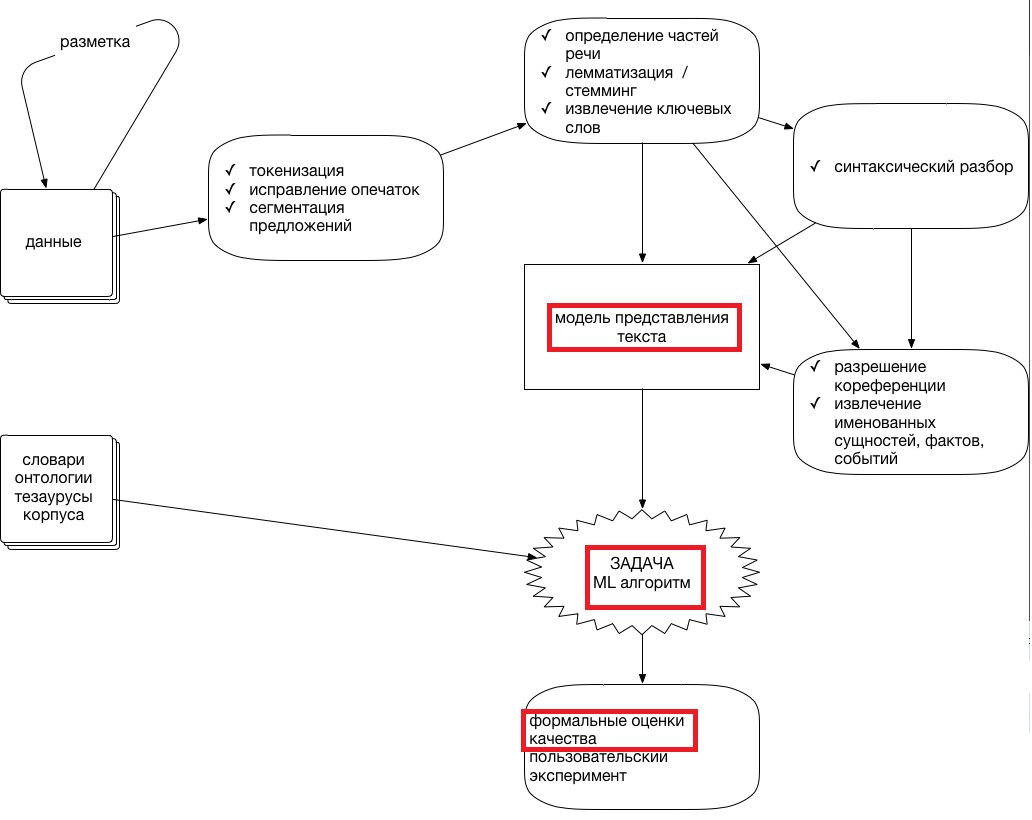

# Дополнительные материалы

Статья, в которой рассматривается пример применения эмбеддингов для анализа текстов. В статье есть ссылки на наборы данных. Это статьи с Хабра. Рассматривается две задачи:
1. Задача классификации, необходимо по последовательности посещенных сайтов определять пользователя;
2. Задача регрессии, необходимо по тексту статьи определить ее рейтинг на Хабрахабре. 

https://habr.com/ru/company/ods/blog/329410/

Мы не рассмотрели модели ELMO и BERT. Хороший обзор: https://3-info.ru/post/9972

Ваш первый BERT: https://habr.com/ru/post/498144/

Колаб с тьюториалом по BERT: https://colab.research.google.com/github/deepmipt/dp_tutorials/blob/master/russian_tutorials/Tutorial_3_RU_Fine_tuning_BERT_classifier.ipynb#scrollTo=CnUUkw_AcHKo